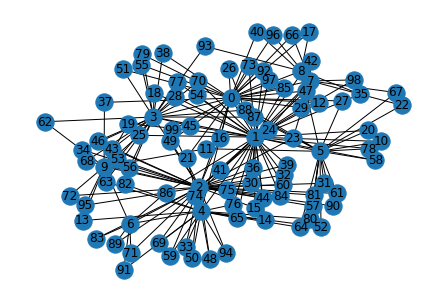

In [2]:
from ba import BAModel
bamodel=BAModel(4)
bamodel.run(2,100)
bamodel.draw()

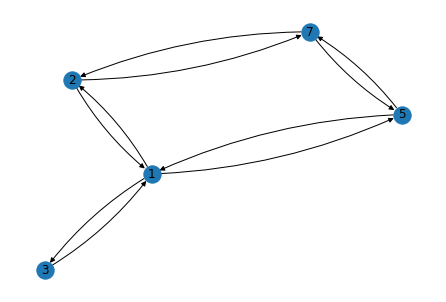

In [1]:
from qw import ArcGraph
G=ArcGraph([(1,2),(1,3),(1,5),(5,7),(2,7)])
#G.complete_graph(3)
G.plot()

[('1', '2'), ('1', '3'), ('2', '3'), ('2', '1'), ('3', '1'), ('3', '2')]
{('1', '2'): '0', ('1', '3'): '0', ('2', '3'): '0', ('2', '1'): '0', ('3', '1'): '0', ('3', '2'): '0'}


{('1', '2'): Text(-0.35771931034461835, 0.040485194136956615, '0'),
 ('1', '3'): Text(0.09373424049376267, -0.8903110685248273, '0'),
 ('2', '3'): Text(0.3002928236352098, 0.06920373733821594, '0'),
 ('2', '1'): Text(-0.5838864570414404, 0.328605776050477, '0'),
 ('3', '1'): Text(0.05742648670940853, -0.109688931475171, '0'),
 ('3', '2'): Text(0.49015221654767727, 0.5617052924743522, '0')}

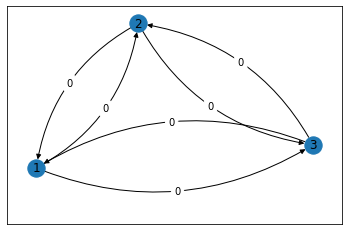

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import label
from qw import ArcGraph
G=ArcGraph([])
G.complete_graph(3)
G=G.graph
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
print(curved_edges)
# straight_edges = list(set(G.edges()) - set(curved_edges))
# print(straight_edges)
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = 0.25')

curved_edge_labels = {edge: "0" for edge in curved_edges}
print(curved_edge_labels)
# straight_edge_labels = {edge: "0" for edge in straight_edges}
label.my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = 0.25)
# nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)

[3, 1, 1, 1]
[(0, 1), (0, 2), (0, 3), (1, 0), (2, 0), (3, 0)]
[-0.33333333333333337, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.0]


{(0,
  1): Text(-0.23072893746102652, 0.5318303812783245, '-0.33333333333333337'),
 (0, 2): Text(-0.2757271551731131, -0.36966188121259935, '0.6666666666666666'),
 (0, 3): Text(0.5077084679746617, -0.16261706343566118, '0.6666666666666666'),
 (1, 0): Text(-0.3524225130584482, 0.2855518908121748, '0.0'),
 (2, 0): Text(-0.14022603343740392, -0.545544805237636, '0.0'),
 (3, 0): Text(0.493186892895346, 0.2580364541457403, '0.0')}

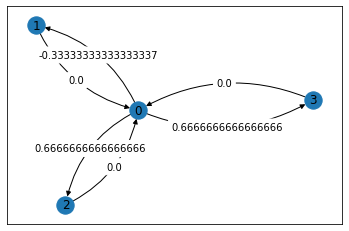

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import label
from qw import ArcGraph
from typing import List, Tuple
import numpy as np
G=ArcGraph([(0,1),(0,2),(0,3)])
#G.complete_graph(3)
G=G.graph
pos=nx.spring_layout(G,seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
deg= [int(d/2) for _,d in G.degree()]
print(deg)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
print(curved_edges)
curved_weight=[0.0 for _ in range(len(curved_edges))]
curved_weight[3]=1.0
curved_weight_copy=[0.0 for _ in range(len(curved_edges))]
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = 0.25')
for i,weight in enumerate(curved_weight):
    if weight==0:
        continue
    for j,edges in enumerate( curved_edges):
        if edges[0]==curved_edges[i][1]:
            if edges[1]==curved_edges[i][0]:
                curved_weight_copy[j]=weight*((2/(deg[edges[0]]))-1)
            else:
                curved_weight_copy[j]=weight*(2/(deg[edges[0]]))
print(curved_weight_copy)
curved_weight=curved_weight_copy
curved_edge_labels = {edge: weight for edge,weight in zip(curved_edges,curved_weight)}
label.my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = 0.25)

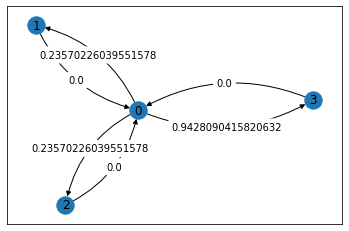

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import label
from grover import Grover

G=Grover([(0,1),(0,2),(0,3)])
G.run_grover()
G.plot()